### **<center>Escuela Politécnica Nacional</center>**

### **<center>INTELIGENCIA ARTIFICIAL</center>**

### **Informe N14 EXTRA**

Nombre: Mateo Sebastian Davalos Renteria

### **<center>WORD2VEC</center>**

**1. Objetivos**
- <div style="text-align: justify">Word2Vec busca crear vectores numéricos para palabras que capturen relaciones semánticas, permitiendo que palabras similares estén cerca en un espacio vectorial.</div>
- <div style="text-align: justify">Utilizar las representaciones generadas por Word2Vec como características en modelos de aprendizaje automático para mejorar la precisión en tareas de NLP, como clasificación de texto y traducción automática.</div>


**2. Introducción**

<div style="text-align: justify">Word2Vec es una técnica fundamental en el campo del Procesamiento de Lenguaje Natural (NLP) y la Inteligencia Artificial que se utiliza para representar palabras como vectores numéricos. Desarrollada por Google en 2013, Word2Vec ha revolucionado la forma en que las computadoras comprenden y procesan el lenguaje humano. Esta técnica se basa en la idea de que las palabras que aparecen en contextos similares tienen significados semánticos similares.</div>
<div style="text-align: justify">Word2Vec convierte cada palabra en un espacio vectorial, donde palabras similares se encuentran más cerca en este espacio. Esto permite capturar relaciones semánticas entre palabras, como sinónimos y analogías. Estos vectores son ampliamente utilizados en aplicaciones de NLP, como traducción automática, análisis de sentimiento, sistemas de recomendación y chatbots, mejorando significativamente la precisión y eficacia de estas tareas. Word2Vec ha sido una contribución significativa para que las computadoras comprendan mejor el significado y el contexto en el procesamiento del lenguaje natural.</div>

**3. Desarrollo**

In [1]:
pip install pypdf2 -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import string
from gensim.models import Word2Vec
import PyPDF2
import pandas as pd

In [3]:
with open('Canciones.txt', 'r', encoding= 'utf-8') as file:
    documento = file.read()

In [4]:
documento

'"Baila, baila sin parar, que la vida es una fiesta." - Shakira\n"Y es que en tus ojos, yo encuentro la paz." - Carlos Vives\n"Me enamoré de una sirena en la orilla del mar." - Jarabe de Palo\n"Si no me quieres, no me martirices, no sigas más." - Maná\n"Yo te esperaba como la luna espera a la mañana." - Ricardo Arjona\n"Caminante, no hay camino, se hace camino al andar." - Joan Manuel Serrat\n"Soy rebelde porque el mundo me ha hecho así." - Jeanette\n"Esos ojitos bellos que han robado el sol." - Los Bunkers\n"Y yo sin ti, y tú sin mí, dime quién puede ser feliz." - Enrique Iglesias\n"Si nos dejan, nos vamos a querer toda la vida." - Vicente Fernández\n"Ella tiene algo que me atrapa." - Marc Anthony\n"Amor eterno, e inolvidable, tarde o temprano estaré contigo." - Rocío Dúrcal\n"Vuela alto, vive libre, sé feliz." - La India\n"Deja de llorar y vuelves a ser tú." - Natalia Lafourcade\n"A veces me parece mentira que se me haya metido en la piel." - Alejandro Sanz\n"Yo te propongo un desliz

In [5]:
len(documento)

56981

# Preprocesamiento de datos

In [6]:
oraciones = documento.split('.')
len(oraciones)

1001

In [7]:
oraciones[0:3]

['"Baila, baila sin parar, que la vida es una fiesta',
 '" - Shakira\n"Y es que en tus ojos, yo encuentro la paz',
 '" - Carlos Vives\n"Me enamoré de una sirena en la orilla del mar']

In [8]:
oraciones_limpias = []
for oracion in oraciones:
    tokens = oracion.translate(str.maketrans('','',
                                            string.punctuation)).split()
    tokens = [word.lower() for word in tokens if word.isalpha()]
    if tokens: 
        oraciones_limpias.append(tokens)

In [9]:
oraciones_limpias[0]

['baila', 'baila', 'sin', 'parar', 'que', 'la', 'vida', 'es', 'una', 'fiesta']

In [10]:
model = Word2Vec(sentences=oraciones_limpias,
                 vector_size=500, window=5, min_count=1, workers=8)

In [11]:
vector = model.wv['vida']

In [12]:
vector

array([ 4.92209382e-03,  9.80619192e-02,  7.05513209e-02,  1.10879339e-01,
       -9.12346616e-02, -1.27086550e-01, -2.03591492e-02,  1.26055866e-01,
        2.74358713e-03, -3.05035822e-02, -2.50340234e-02,  7.60468990e-02,
       -8.53947084e-03,  1.02675639e-01,  2.98891068e-02, -8.03700089e-02,
       -1.15141846e-01, -7.59806260e-02,  6.10594191e-02,  2.14235578e-02,
        6.97370842e-02, -2.94150822e-02,  6.48190230e-02, -2.47714240e-02,
        2.70630717e-02,  2.16507670e-02, -1.33496905e-02, -9.19031631e-03,
       -1.17102757e-01,  3.35515738e-02,  1.26604795e-01, -7.98035506e-03,
       -1.89804360e-02, -3.41082364e-03,  1.16227716e-01,  4.40462865e-02,
        3.08095161e-02,  1.80176478e-02, -5.81355505e-02, -1.50969461e-01,
        1.25251198e-02, -7.46599436e-02, -1.41558260e-01, -3.32671590e-02,
       -1.22621849e-01, -8.24357197e-02, -1.20041765e-01,  7.55412057e-02,
        3.51231806e-02,  4.01899405e-02, -4.53371555e-02,  1.61827467e-02,
       -1.76301338e-02, -

In [13]:
palabras_cercanas = model.wv.most_similar("vida", topn=10)
palabras_cercanas

[('que', 0.9998073577880859),
 ('la', 0.9997963905334473),
 ('es', 0.999777615070343),
 ('si', 0.9997717142105103),
 ('de', 0.9997677206993103),
 ('no', 0.9997652173042297),
 ('el', 0.9997546672821045),
 ('mi', 0.9997442364692688),
 ('y', 0.9997439980506897),
 ('amor', 0.9997380375862122)]

In [14]:
palabras_cercanas = model.wv.most_similar("vida", topn=10)
palabras_cercanas

[('que', 0.9998073577880859),
 ('la', 0.9997963905334473),
 ('es', 0.999777615070343),
 ('si', 0.9997717142105103),
 ('de', 0.9997677206993103),
 ('no', 0.9997652173042297),
 ('el', 0.9997546672821045),
 ('mi', 0.9997442364692688),
 ('y', 0.9997439980506897),
 ('amor', 0.9997380375862122)]

In [15]:
palabras_cercanas = model.wv.most_similar("amor", topn=10)
palabras_cercanas

[('que', 0.9998693466186523),
 ('no', 0.9998564124107361),
 ('si', 0.9998539686203003),
 ('de', 0.9998514652252197),
 ('mi', 0.9998475909233093),
 ('un', 0.9998472332954407),
 ('la', 0.9998447299003601),
 ('por', 0.9998434782028198),
 ('el', 0.9998422265052795),
 ('te', 0.9998307824134827)]

In [16]:
palabras_cercanas = model.wv.most_similar("vivir", topn=10)
palabras_cercanas

[('amor', 0.999600887298584),
 ('de', 0.9995915293693542),
 ('que', 0.9995889067649841),
 ('no', 0.9995816946029663),
 ('mi', 0.999578595161438),
 ('para', 0.9995719790458679),
 ('si', 0.9995677471160889),
 ('eres', 0.9995649456977844),
 ('la', 0.9995539784431458),
 ('por', 0.9995496869087219)]

In [17]:
model.save("Canciones.model")
modelo_cargado = Word2Vec.load("Canciones.model")

In [18]:
palabras_cercanas = modelo_cargado.wv.most_similar("vida", topn=10)
palabras_cercanas

[('que', 0.9998073577880859),
 ('la', 0.9997963905334473),
 ('es', 0.999777615070343),
 ('si', 0.9997717142105103),
 ('de', 0.9997677206993103),
 ('no', 0.9997652173042297),
 ('el', 0.9997546672821045),
 ('mi', 0.9997442364692688),
 ('y', 0.9997439980506897),
 ('amor', 0.9997380375862122)]

In [19]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [20]:
## Next you have some necessary steps part of the transformation of 300dim to 2D in order to plot
pca = PCA(n_components=2)

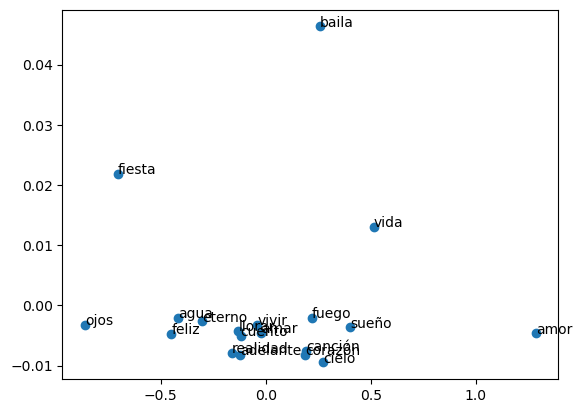

In [21]:
# you can think of a group of words that make sense to be together/far away to view in the plot
toplot_words = ['amor', 'vida', 'feliz', 'corazón',  #words about positive feelings 
                'vivir', 'realidad', 'agua', 'llorar',  #
                'baila', 'fiesta', 'fuego', 'cuento',  #media-related words
                'eterno', 'cielo', 'canción', 'amar', 'adelante', 'sueño', 'ojos'  #politics-related words
                ]

toplot_vecs = [model.wv[w] for w in toplot_words]  #getting the vectors for the specific words in toplot_words
result = pca.fit_transform(toplot_vecs)  #call to pca for transformation

# finally plotting...
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(toplot_words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# Analogias

In [22]:
# Analogias
similar_words = model.wv.most_similar(positive=['amor', 'feliz'], negative=['dolor'], topn=10)
similar_words

[('el', 0.9974050521850586),
 ('se', 0.9973604679107666),
 ('de', 0.997359573841095),
 ('la', 0.9973589181900024),
 ('es', 0.9973569512367249),
 ('para', 0.9973387122154236),
 ('como', 0.9973249435424805),
 ('que', 0.9973206520080566),
 ('si', 0.9973195195198059),
 ('cielo', 0.9973130226135254)]

In [23]:
similar_words = model.wv.most_similar(positive=['baila', 'amar'], negative=['llorar'], topn=10)
similar_words

[('maná', 0.9987181425094604),
 ('es', 0.9986913800239563),
 ('una', 0.9986825585365295),
 ('la', 0.9986820220947266),
 ('vida', 0.9986706376075745),
 ('que', 0.9986532926559448),
 ('tu', 0.9986324310302734),
 ('soy', 0.9985966682434082),
 ('un', 0.9985923171043396),
 ('para', 0.9985918402671814)]

In [24]:
similar_words = model.wv.most_similar(positive=['cielo', 'linda'], negative=['llorar'], topn=10)
similar_words

[('te', 0.9982593655586243),
 ('que', 0.9982531666755676),
 ('en', 0.9982467889785767),
 ('un', 0.9982402324676514),
 ('soy', 0.998232364654541),
 ('y', 0.9982317686080933),
 ('el', 0.9982268214225769),
 ('no', 0.9982226490974426),
 ('por', 0.9982139468193054),
 ('como', 0.998206377029419)]

In [25]:
similar_words = model.wv.most_similar(positive=['feliz', 'amar'], negative=['regresa'], topn=10)
similar_words

[('se', 0.997640073299408),
 ('mi', 0.9976257681846619),
 ('amor', 0.9976183772087097),
 ('el', 0.9976006150245667),
 ('de', 0.997574508190155),
 ('que', 0.997572660446167),
 ('un', 0.9975712895393372),
 ('no', 0.9975705146789551),
 ('la', 0.9975690245628357),
 ('ti', 0.997563362121582)]

In [26]:
similar_words = model.wv.most_similar(positive=['debilidad', 'tiempo'], negative=['refugio'], topn=10)
similar_words

[('es', 0.9962650537490845),
 ('que', 0.9962545037269592),
 ('del', 0.9962429404258728),
 ('y', 0.9962420463562012),
 ('si', 0.9962417483329773),
 ('dos', 0.9962382912635803),
 ('te', 0.9962370991706848),
 ('como', 0.9962316155433655),
 ('mi', 0.9962285161018372),
 ('el', 0.9962241649627686)]

In [27]:
similar_words = model.wv.most_similar(positive=['sueños', 'llorar'], negative=['callado'], topn=10)
similar_words

[('los', 0.9974968433380127),
 ('la', 0.9974425435066223),
 ('mi', 0.9974235892295837),
 ('y', 0.997423529624939),
 ('para', 0.9974210262298584),
 ('no', 0.9974197745323181),
 ('de', 0.9974187016487122),
 ('tú', 0.9974105954170227),
 ('que', 0.997407853603363),
 ('una', 0.9974064826965332)]

In [28]:
similar_words = model.wv.most_similar(positive=['despacito', 'mundo'], negative=['tiempo'], topn=10)
similar_words

[('que', 0.9987494349479675),
 ('ella', 0.9987414479255676),
 ('el', 0.9987373948097229),
 ('quiero', 0.9987371563911438),
 ('y', 0.9987332820892334),
 ('para', 0.998732328414917),
 ('si', 0.9987309575080872),
 ('un', 0.9987288117408752),
 ('es', 0.9987280964851379),
 ('te', 0.9987272620201111)]

In [29]:
similar_words = model.wv.most_similar(positive=['sueño', 'dolor'], negative=['vida'], topn=10)
similar_words

[('eres', 0.9979124665260315),
 ('mi', 0.9978993535041809),
 ('esa', 0.9978986978530884),
 ('no', 0.997896134853363),
 ('un', 0.9978960156440735),
 ('y', 0.9978870749473572),
 ('a', 0.9978783130645752),
 ('si', 0.997873067855835),
 ('del', 0.9978728294372559),
 ('que', 0.9978650808334351)]

In [30]:
similar_words = model.wv.most_similar(positive=['beso', 'promesa'], negative=['perderte'], topn=10)
similar_words

[('y', 0.9973393082618713),
 ('por', 0.9973134994506836),
 ('un', 0.9973017573356628),
 ('en', 0.9972976446151733),
 ('yo', 0.9972935914993286),
 ('dos', 0.9972851872444153),
 ('de', 0.9972756505012512),
 ('mi', 0.9972681999206543),
 ('no', 0.9972678422927856),
 ('una', 0.9972643256187439)]

In [31]:
similar_words = model.wv.most_similar(positive=['despedida', 'regresa'], negative=['miedo'], topn=10)
similar_words

[('por', 0.9975991249084473),
 ('no', 0.9975868463516235),
 ('eres', 0.9975863695144653),
 ('de', 0.9975807666778564),
 ('y', 0.9975787401199341),
 ('como', 0.9975459575653076),
 ('en', 0.9975448846817017),
 ('si', 0.9975249171257019),
 ('sol', 0.9975232481956482),
 ('el', 0.997505247592926)]

# Similaridades

In [32]:
# Calcular similarity between word vectors
sim1 = model.wv.similarity('amor', 'feliz')
sim2 = model.wv.similarity('amor', 'dolor')
sim3 = model.wv.similarity('amor', 'llorar')
sim4 = model.wv.similarity('querer', 'llorar')
sim5 = model.wv.similarity('feliz', 'camino')
sim6 = model.wv.similarity('tiempo', 'llorar')
sim7 = model.wv.similarity('luz', 'vida')
sim8 = model.wv.similarity('duela', 'piel')
sim9 = model.wv.similarity('amor', 'rosa')
sim10 = model.wv.similarity('cielo', 'linda')

print('Similarity between "amor" and "feliz":', sim1)
print('Similarity between "amor" and "dolor":', sim2)
print('Similarity between "amor" and "llorar":', sim3)
print('Similarity between "querer" and "llorar":', sim4)
print('Similarity between "feliz" and "camino":', sim5)
print('Similarity between "tiempo" and "llorar":', sim6)
print('Similarity between "luz" and "vida":', sim7)
print('Similarity between "duela" and "piel":', sim8)
print('Similarity between "amor" and "rosa":', sim9)
print('Similarity between "cielo" and "linda":', sim10)

Similarity between "amor" and "feliz": 0.99915016
Similarity between "amor" and "dolor": 0.99818623
Similarity between "amor" and "llorar": 0.99956536
Similarity between "querer" and "llorar": 0.8616605
Similarity between "feliz" and "camino": 0.99881953
Similarity between "tiempo" and "llorar": 0.999228
Similarity between "luz" and "vida": 0.9993726
Similarity between "duela" and "piel": 0.9989676
Similarity between "amor" and "rosa": 0.9987431
Similarity between "cielo" and "linda": 0.99871117


## 4. Conclusiones

* Word2Vec permite a las máquinas entender el significado de las palabras en función de su contexto, lo que mejora la comprensión semántica en aplicaciones de procesamiento de lenguaje natural. Esto facilita la detección de similitudes, analogías y relaciones entre palabras, lo que a su vez aumenta la precisión en tareas de NLP.

*  Las representaciones vectoriales generadas por Word2Vec son ampliamente aplicables en una variedad de campos de la inteligencia artificial, como clasificación de texto, traducción automática, análisis de sentimiento, recomendación de contenido y chatbots.

## 5. Referencias

\[1] https://www.youtube.com/watch?v=zk7gvC8O8rM
\[2] https://github.com/lore10/GEITEC_curso

## 6. Link de Github Proyecto
